In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
df_train = pd.read_csv('train.csv', delimiter =',')
df_train.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [5]:
df_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


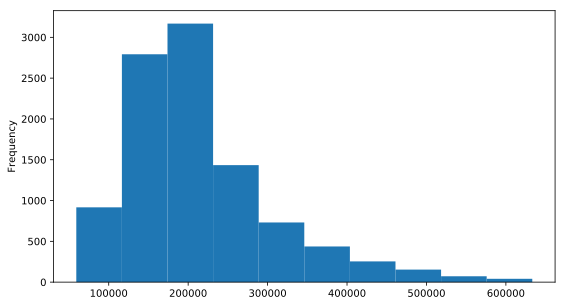

In [6]:
plt.figure(figsize = (9, 5))
df_train['Price'].plot(kind ="hist")

#### Проверим признаки на уникальность

In [7]:
print(df_train.nunique())

Id               10000
DistrictId         205
Rooms                9
Square           10000
LifeSquare        7887
KitchenSquare       58
Floor               33
HouseFloor          44
HouseYear           97
Ecology_1          129
Ecology_2            2
Ecology_3            2
Social_1            51
Social_2           142
Social_3            30
Healthcare_1        79
Helthcare_2          7
Shops_1             16
Shops_2              2
Price            10000
dtype: int64


In [8]:
print(df_train.isnull().sum() / df_train.shape[0] * 100)

Id                0.00
DistrictId        0.00
Rooms             0.00
Square            0.00
LifeSquare       21.13
KitchenSquare     0.00
Floor             0.00
HouseFloor        0.00
HouseYear         0.00
Ecology_1         0.00
Ecology_2         0.00
Ecology_3         0.00
Social_1          0.00
Social_2          0.00
Social_3          0.00
Healthcare_1     47.98
Helthcare_2       0.00
Shops_1           0.00
Shops_2           0.00
Price             0.00
dtype: float64


#### Заполним ячейки с отсутствующими значениями и обработаем номинативные переменные

In [9]:
df_train = df_train.fillna(method='pad')
df_train = pd.get_dummies(df_train)

#### Построим корриляционную матрицу

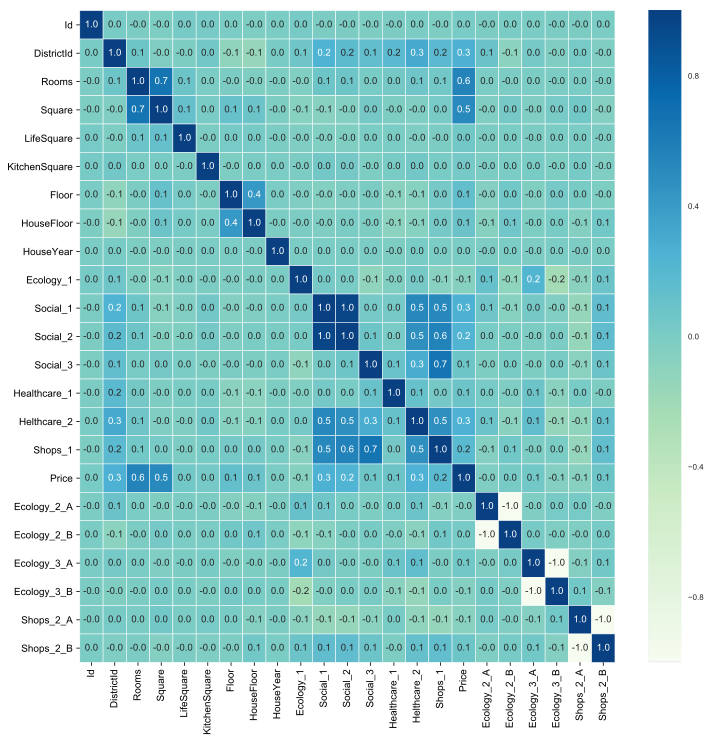

In [10]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize =(12, 12))
sns.set(font_scale=0.8)
sns.heatmap(corrmat, ax = ax, annot=True, fmt='.1f', linewidths=.5, cmap='GnBu')

#### Избавляемся от слабо коррелирующих признаков

In [11]:
drop_feature = ['Id','KitchenSquare','LifeSquare', 'HouseYear','Ecology_1',
                'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_B','Shops_2_A','Healthcare_1']
df_train.drop(drop_feature, axis=1, inplace=True)

#### Разбиение на train и test

In [12]:
X = pd.DataFrame(df_train)
y = pd.DataFrame(X, columns=['Price'])
X.drop(['Price'], axis=1, inplace=True)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42)

#### Создание модели

In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1500, max_depth=42, random_state=42, max_features=7,criterion='mse')
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=42,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1500, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

#### Обучение модели

In [15]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=42,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1500, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

#### Предсказание на тестовой выборке и оценка

In [16]:
y_pred = model.predict(X_valid)
y_pred.shape

(4000,)

In [17]:
check_test = pd.DataFrame({ 
    "y_test": y_valid["Price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
6252,181530.459031,196157.784751
4684,260456.004692,328539.603924
1731,219945.304640,209586.322945
4742,66883.280318,67133.596084
4521,114086.065201,127334.304655
6340,359065.287230,362644.651804
576,377445.078933,277210.963439
5202,381912.162109,175130.878539
6363,133072.279471,130167.861524
439,184036.005146,179078.151772


In [18]:
from sklearn.metrics import r2_score
r2_score(check_test["y_test"], check_test["y_pred"])

0.7090247551500977

#### Кросс-вылидация

In [19]:
from sklearn.model_selection import cross_val_score, KFold
cv_score = cross_val_score(model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=42))
cv_score

array([0.71161755, 0.71896861, 0.71435336])

In [20]:
cv_score.mean()

0.714979839857302

#### Проверка модели на тестовом файле

In [21]:
df_test = pd.read_csv('test.csv', delimiter =',')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [22]:
X_test = pd.get_dummies(df_test)
X_test.fillna(method='pad')
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Ecology_2_A      5000 non-null uint8
Ecology_2_B      5000 non-null uint8
Ecology_3_A      5000 non-null uint8
Ecology_3_B      5000 non-null uint8
Shops_2_A        5000 non-null uint8
Shops_2_B        5000 non-null uint8
dtypes: float64(7), int64(9), uint8(6)
memory usage: 654.4 KB


In [23]:
X_test.drop(drop_feature, axis=1, inplace=True)

In [24]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
DistrictId     5000 non-null int64
Rooms          5000 non-null float64
Square         5000 non-null float64
Floor          5000 non-null int64
HouseFloor     5000 non-null float64
Social_1       5000 non-null int64
Social_2       5000 non-null int64
Social_3       5000 non-null int64
Helthcare_2    5000 non-null int64
Shops_1        5000 non-null int64
Ecology_3_A    5000 non-null uint8
Shops_2_B      5000 non-null uint8
dtypes: float64(3), int64(7), uint8(2)
memory usage: 400.5 KB


In [25]:
predictions = model.predict(X_test)
df_test["Price"] = predictions

In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
Price            5000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 781.3+ KB


In [27]:
submit = pd.read_csv('sample_submission.csv', delimiter =',')
submit.head()

,Id,Price
0,725,200000.0
1,15856,200000.0
2,5480,200000.0
3,15664,200000.0
4,14275,200000.0


In [28]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,725,176892.071231
1,15856,229468.124890
2,5480,164696.078049
3,15664,345171.559205
4,14275,136078.129664


#### Выгрузка файла с предсказаниями

In [29]:
submit.to_csv('IShmanov_predictions.csv', index=False)

https://www.kaggle.com/igorshmanov